<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2 - EXPLORATORY DATA ANALYSIS (EDA) 📌
</div>

## **IMPORT LIBRARY** 🎄

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## **EXPLORING DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 1: Đọc dữ liệu đã được tiền xử lý 🔥
</div>

In [2]:
df = pd.read_csv('../Data/2425_QC_cleaned.csv')
df.head(10)

,Ad Topic Line,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,City,Country,Clicked on Ad,Timestamp
0,Cloned 5thgeneration orchestration,61833.90,0,35,68.95,256.09,Wrightburgh,Tunisia,0,2016-03-27 00:53:00
1,Monitored national standardization,68441.85,1,31,80.23,193.77,West Jodi,Nauru,0,2016-04-04 01:39:00
2,Organic bottom-line service-desk,59785.94,0,26,69.47,236.50,Davidton,San Marino,0,2016-03-13 20:35:00
3,Triple-buffered reciprocal time-frame,54806.18,1,29,74.15,245.89,West Terrifurt,Italy,0,2016-10-01 02:31:00
4,Robust logistical utilization,73889.99,0,35,68.37,225.58,South Manuel,Iceland,0,2016-03-06 03:36:00
5,Sharable client-driven software,59761.56,1,23,59.99,226.74,Jamieberg,Norway,0,2016-05-19 14:30:00
6,Enhanced dedicated support,53852.85,0,33,88.91,208.36,Brandonstad,Myanmar,0,2016-01-28 20:59:00
7,Reactive local challenge,24593.33,1,48,66.00,131.76,Port Jefferybury,Australia,1,2016-07-03 01:40:00
8,Configurable coherent function,68862.00,1,30,74.53,221.51,West Colin,Grenada,0,2016-04-18 09:33:00
9,Mandatory homogeneous architecture,55642.32,1,20,69.88,183.82,Ramirezton,Ghana,0,2016-11-07 01:42:00


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 2: Phân tích các thuộc tính phân loại 🔥
</div>

🔎 **Ở bước này, chúng ta cần quan tâm 2 thuộc tính `Country` và `City`**

Vậy thì chúng ta sẽ lấy top 10 các đất nước và các thành phố có số lượng người dùng nhiều nhất và trực quan hoá lên biểu đồ để xem xét.

Các quốc gia có nhiều người dùng nhất:
Country
Czech Republic    9
France            9
Senegal           8
Peru              8
Greece            8
Micronesia        8
Liberia           8
Turkey            8
Afghanistan       8
South Africa      8
Name: count, dtype: int64

Các thành phố có nhiều người dùng nhất:
City
Lisamouth          3
Williamsport       3
West Amanda        2
East Timothy       2
Lake Patrick       2
Wrightburgh        2
New Sheila         2
Port Juan          2
New Jessicaport    2
Millerbury         2
Name: count, dtype: int64


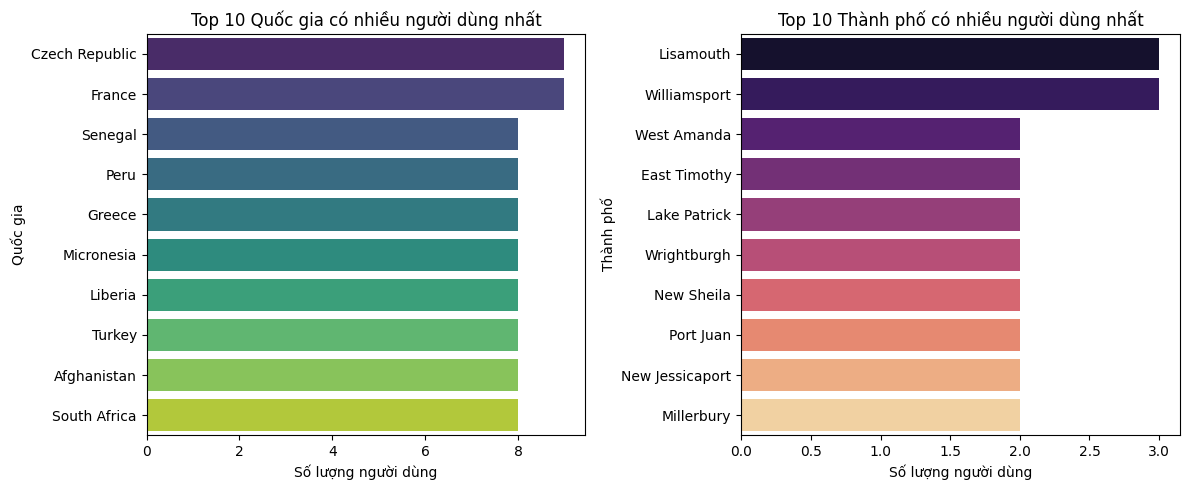

In [3]:
top_countries = df['Country'].value_counts().head(10) 
print("Các quốc gia có nhiều người dùng nhất:")
print(top_countries)

top_cities = df['City'].value_counts().head(10)  
print("\nCác thành phố có nhiều người dùng nhất:")
print(top_cities)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.barplot(ax=axes[0], x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis", dodge=False, legend=False)
axes[0].set_title("Top 10 Quốc gia có nhiều người dùng nhất")
axes[0].set_xlabel("Số lượng người dùng")
axes[0].set_ylabel("Quốc gia")

sns.barplot(ax=axes[1], x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="magma", dodge=False, legend=False)
axes[1].set_title("Top 10 Thành phố có nhiều người dùng nhất")
axes[1].set_xlabel("Số lượng người dùng")
axes[1].set_ylabel("Thành phố")

plt.tight_layout()
plt.show()


### **Quan sát** 💬
- Top các quốc gia có lượng người dùng cao nhất đến từ nhiều khu vực trên thế giới, bao gồm Czech Republic, France, Senegal, Turkey, và South Africa.

- Số lượng người dùng phân bố khá đồng đều, với số người dùng cao nhất chỉ là 9 (Czech Republic và France). Điều này cho thấy không có quốc gia nào chiếm phần lớn người dùng, mà thay vào đó là một mạng lưới người dùng phân tán khắp nơi.

- Các thành phố như Lisamouth, Williamsport, và một số thành phố khác có mức độ người dùng tương đối cao. Điều này có thể là cơ hội để đội ngũ marketing nhắm đến các khu vực này với các quảng cáo hoặc ưu đãi phù hợp nhằm tăng sự trung thành của người dùng hiện tại và thu hút thêm người dùng mới.

🔎 **Tiếp theo, chúng ta cần quan tâm thuộc tính `Ad Topic Line`**

Bây giờ, chúng ta sẽ lấy ra top 10 chủ đề quảng cáo được quan tâm nhất và phân tích chúng.

In [4]:
top_ads = df['Ad Topic Line'].value_counts().head(10)
print("Top 10 chủ đề quảng cáo được nhiều người dùng quan tâm nhất:")
print(top_ads)

Top 10 chủ đề quảng cáo được nhiều người dùng quan tâm nhất:
Ad Topic Line
Virtual 5thgeneration emulation            1
Cloned 5thgeneration orchestration         1
Monitored national standardization         1
Organic bottom-line service-desk           1
Triple-buffered reciprocal time-frame      1
Robust logistical utilization              1
Sharable client-driven software            1
Enhanced dedicated support                 1
Distributed fault-tolerant service-desk    1
Up-sized asymmetric firmware               1
Name: count, dtype: int64


### **Nhận xét** 📈
- Ta có thể thấy chủ đề quảng cáo được quan tâm nhiều nhất chỉ có 1 người, điều này có nghĩa rằng trên tập dữ liệu 1000 dòng này tương ứng với 1000 chủ đề quảng cáo.

- Vì vậy, ta không thể nhận xét được chủ đề quảng cáo nào được nhiều người hay ít người quan tâm nhất.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 3: Phân tích các thuộc tính số 🔥
</div>

In [5]:
numerical_columns = df.select_dtypes(exclude=['object', 'datetime64']).columns
category_columns = df.select_dtypes(include=['object']).columns
df.describe()[numerical_columns]

,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55000.000080,0.481000,36.018000,65.000200,180.000100,0.50000
std,13414.634022,0.499889,8.779907,15.853615,43.902339,0.50025
min,13996.500000,0.000000,19.000000,32.600000,104.780000,0.00000
25%,47031.802500,0.000000,29.000000,51.360000,138.830000,0.00000
50%,57012.300000,0.000000,35.000000,68.215000,183.130000,0.50000
75%,65470.635000,1.000000,42.000000,78.547500,218.792500,1.00000
max,79484.800000,1.000000,61.000000,91.430000,269.960000,1.00000


### **Quan sát** 💬

- `Area Income`: Chúng ta có thể thấy, mức lương thấp nhất và cao nhất của khách hàng lần lượt là 13996.5 và 79484.8, điều này cho tha thấy rằng khách hàng là những người thuộc những tầng lớp có mức thu nhập khác nhau. Chính vì vậy, chúng ta có thể đào sâu hơn để tìm hiểu sự ảnh hưởng của mức luơng đối với việc khách hàng có nhấp vào quảng cáo hay không.

- `Male`: Khoảng 48% khách hàng là Nam, số lượng khách hàng nữ là 52%. Chúng ta cũng có thể đào sâu hơn vô thuộc tính này để kiểm tra mức độ ảnh hưởng của giới tính với việc nhấp vào quảng cáo.

- `Age`: Độ tuổi của khách hàng nằm trong khoảng từ 19 đến 61 tuổi, và chúng ta có thể thấy rằng khách hàng hầu hết là người lớn.

- `Daily Time Spent on Site`: Chúng ta có thể thấy thằng khách hàng dành thời gian truy cập vào Site từ khoảng 32 đến 91 phút, và trung bình khoảng 65 phút mỗi ngày. Đây là một con số khá lớn, vì vậy chúng ta có thể kết luận đây là một Site có mức ảnh hưởng khá là lớn. Và chúng ta nên đào sâu hơn vô thuộc tính này để kiểm tra mức độ ảnh hưởng của việc nhấp vào quảng cáo.

- `Daily Internet Usage`: Thời gian khách hàng sử dụng Internet hàng ngày nằm ở khoảng từ 104 phút tới 270 phút. Đây cũng là một con số khá lớn của một người khi dành thời gian sử dụng Internet hàng ngày. Khoảng thời gian này cũng lớn hơn khá nhiều so với khoảng thời gian khách hàng dành cho việc truy cập vào Site trong một ngày. Chúng ta cũng sẽ xem xét thuộc tính này bên cạnh thuộc tính thời gian truy cập vào Site.

- `Clicked on Ad`: Chúng ta có thể thấy rằng độ phân phối giữa việc nhấp hay không nhấp vào quảng cáo khá đều, 50% cho có nhấp và 50% cho không nhấp. Điều này cho thấy thằng bộ dữ liệu cọ sự cân bằng khá tốt.

🔎 **Bây giờ, chúng ta sẽ kiểm tra sâu hơn về các thuộc tính cần quan tâm.**

Đầu tiên, chúng ta sẽ vẽ biểu đồ coi sự phân phối của các thuộc tính số

Độ lệch (Skewness):
Area Income                 -0.65
Male                         0.08
Age                          0.48
Daily Time Spent on Site    -0.37
Daily Internet Usage        -0.03
Clicked on Ad                0.00
dtype: object

Độ nhọn (Kurtosis):
Area Income                 -0.10
Male                        -2.00
Age                         -0.40
Daily Time Spent on Site    -1.10
Daily Internet Usage        -1.27
Clicked on Ad               -2.00
dtype: object


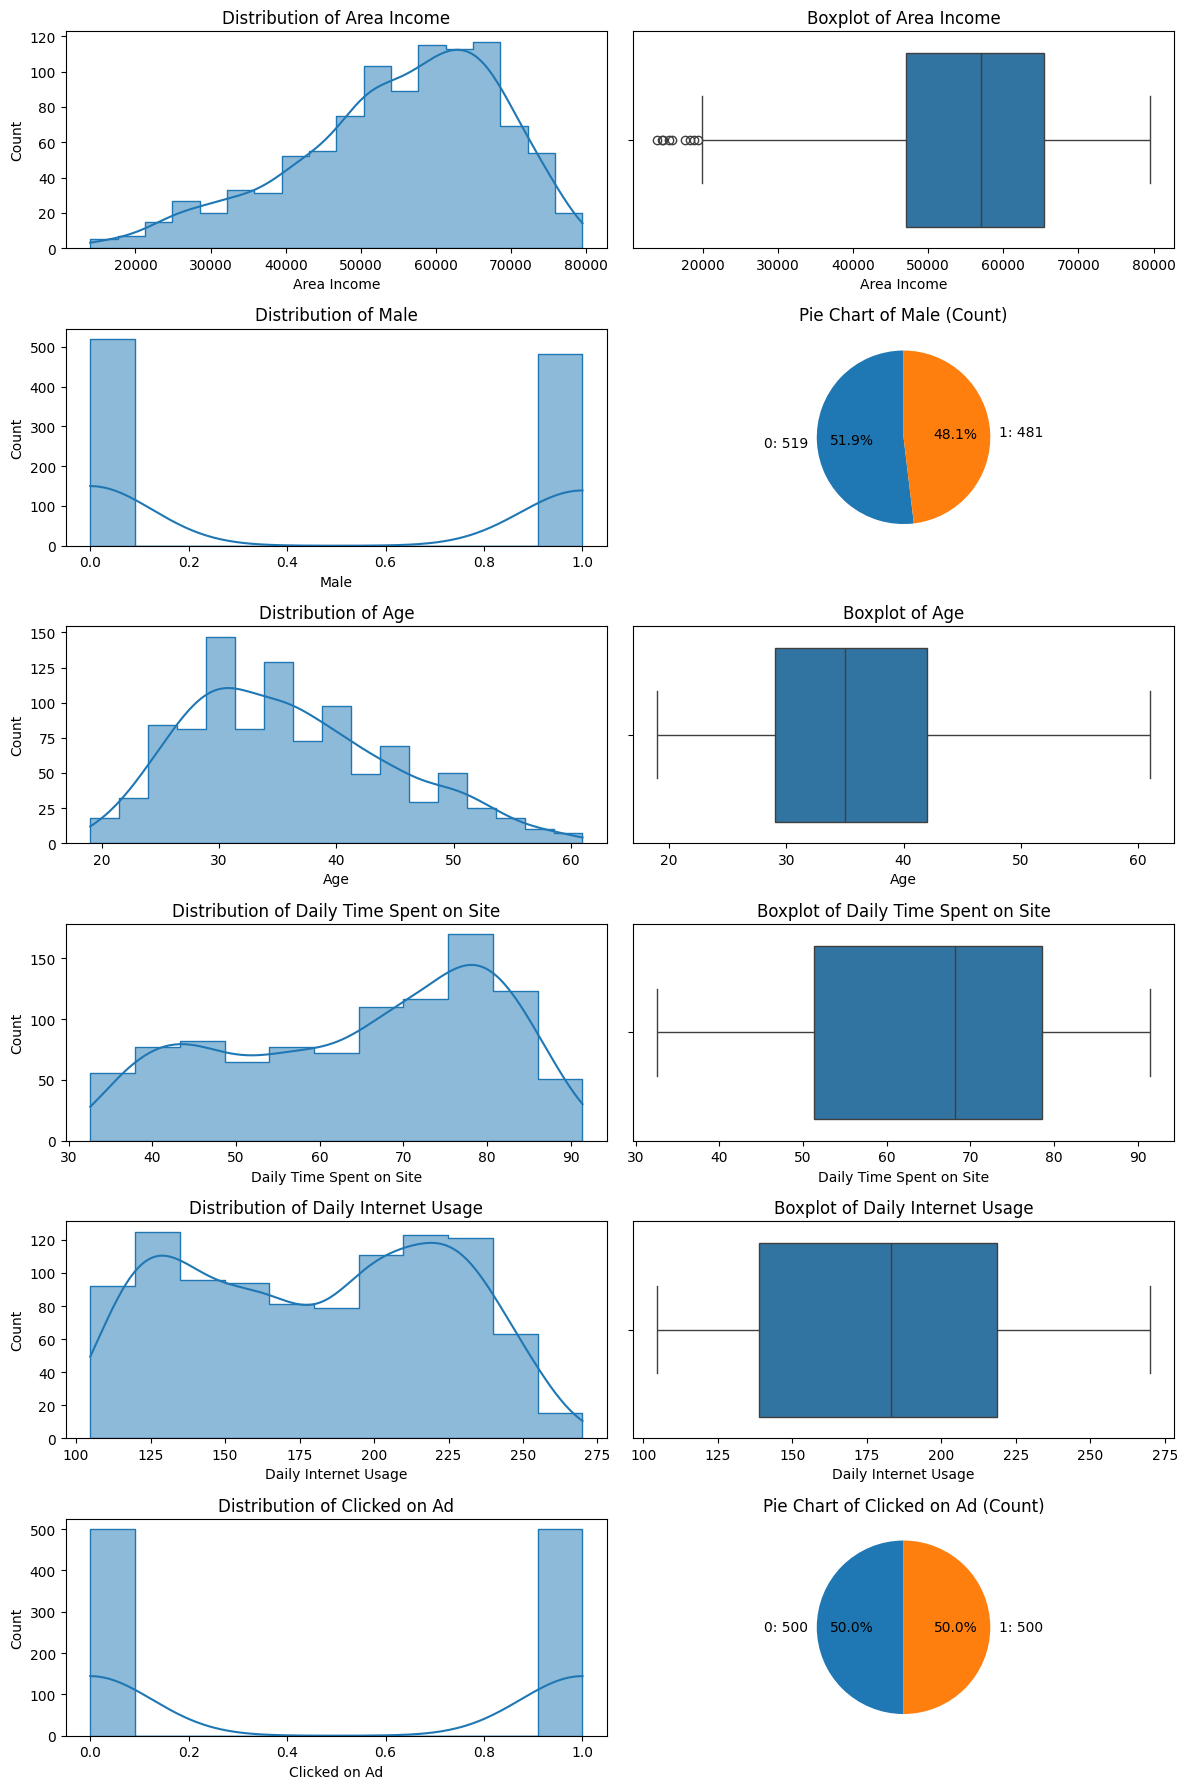

In [6]:
skewness = df[numerical_columns].apply(lambda x: x.skew())
kurtosis = df[numerical_columns].apply(lambda x: x.kurtosis())

skewness = skewness.apply(lambda x: format(x, '.2f'))
kurtosis = kurtosis.apply(lambda x: format(x, '.2f'))

print("Độ lệch (Skewness):")
print(skewness)
print("\nĐộ nhọn (Kurtosis):")
print(kurtosis)

plt.figure(figsize=(12, 3 * len(numerical_columns)))

for i, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.histplot(data=df, x=feature, kde=True, element="step")
    plt.title(f'Distribution of {feature}')
    
    if feature in ['Male', 'Clicked on Ad']:
        values = df[feature].value_counts()
        plt.subplot(len(numerical_columns), 2, 2 * i + 2)
        plt.pie(values, labels=[f'{label}: {count}' for label, count in zip(values.index, values)], startangle=90, autopct='%1.1f%%')
        plt.title(f'Pie Chart of {feature} (Count)')
    else:
        # Vẽ boxplot cho các feature khác
        plt.subplot(len(numerical_columns), 2, 2 * i + 2)
        sns.boxplot(data=df, x=feature)
        plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


### **Quan sát** 💬
- **`Area Income`**
    - Độ lệch nhỏ hơn và cách xa 0 nên có thể nhận xét rằng nhiều người có thu nhập cao hơn trung bình, nhưng lại có ít người có thu nhập cao.
    - Độ nhọn nhỏ hơn 0 cho thấy thống kê có ít giá trị tập trung ở trung bình hơn so với phân phối chuẩn, đồng thời có xu hướng ít xuất hiện giá trị outliers hơn.

- **`Male`**
    - Số lượng năm và nữ xấp xỉ tương đương nhau, nhưng nam vẫn ít hơn nữ.

- **`Age`**
    - Dựa theo biểu đồ histogram, cột "Age" không theo phân phối chuẩn do bị lệch phải.
    - Biểu đồ cho thấy một số nhóm tuổi phổ biến, đặc biệt là từ 30 đến 40 tuổi.

- **`Daily Time Spent on Site`**
    - Có độ nhọn -1.10, cho thấy có ít sự xuất hiện của các giá trị gần cực đại và cực tiểu.
    - Độ lệch -0.37 nên thấy được đồ thị tần suất bị lệch sang trái.

- **`Daily Internet Usage`**
    - Biểu đồ histogram và đường mật độ cho thấy phân bố thời gian sử dụng internet không hoàn toàn đối xứng, có vẻ hơi lệch về bên phải.
    - Điều này có thể cho thấy rằng một số người dùng có xu hướng sử dụng internet nhiều hơn trung bình.
    - Đa số người dùng có thời gian sử dụng internet nằm trong khoảng từ 125 đến 225 phút mỗi ngày. Đây là khoảng thời gian mà số lượng người dùng cao nhất (tập trung nhiều cột cao trong biểu đồ).
    - Có sự phân nhóm khá rõ ràng: phần lớn người dùng có mức sử dụng trung bình, trong khi một số ít người dùng có thời gian sử dụng cao hơn (từ 225 phút trở lên) và thấp hơn (dưới 125 phút).

### **Nhận xét** 📈
- Dựa vào kết quả phân tích ở trên, chúng ta có thể thấy rẳng các giá trị `Daily Time Spent on Site`, `Area Income`, `Age`, có xu hướng phân bố không đồng đều, một ví dụ điển hình là có đuôi dài hơn.

- Trong khi đó, giá trị `Daily Internet Usage` được phân bố khá đồng đều và chỉ lõm ở một phần nhỏ ở giữa biểu đồ. 

- Ngoài ra, kết quả tính toán độ lệch (skewness) cũng cho thấy `Daily Internet Usage` có giá trị độ lệch gần nhất với 0, trong khi `Daily Time Spent on Site`, `Age` và `Area Income` rất xa 0.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 4: Mô tả mối tương quan giữa các cột trong tập dữ liệu 🔥
</div>

Bây giờ chúng ta sẽ xem xét các thuộc tính có sẵn trong tập dữ liệu để xác định và phân tích mối quan hệ giữa chúng. Sau đó là xác định những thuộc tính nào trong tập dữ liệu đóng góp đáng kể cho mục tiêu của chúng ta.  

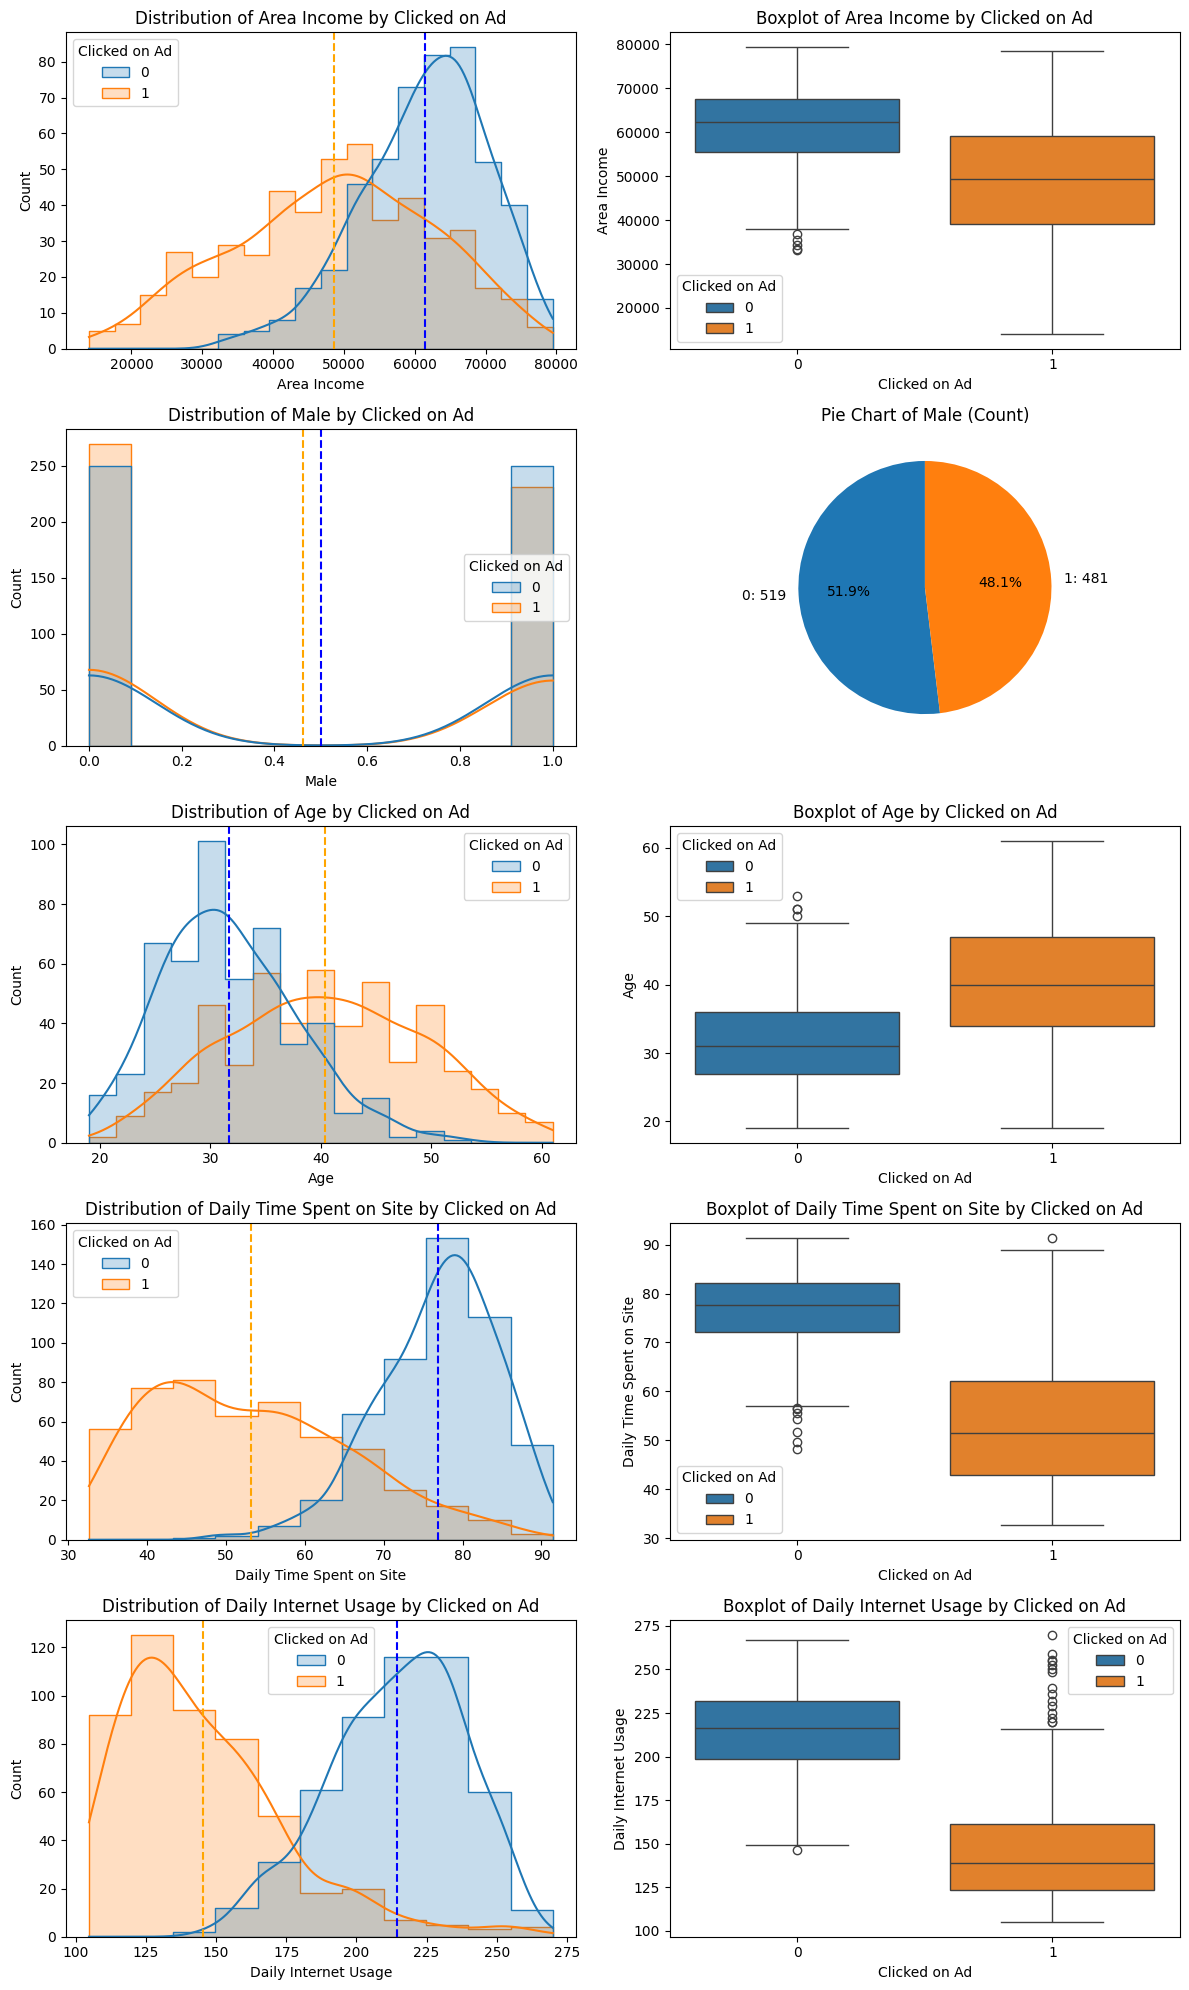

In [7]:
fig, axes = plt.subplots(len(numerical_columns) - 1, 2, figsize=(12, 4 * (len(numerical_columns) - 1)))  # Số hàng dựa trên số lượng feature, trừ `Clicked on Ad`

for row, feature in enumerate(numerical_columns):
    if feature == 'Clicked on Ad':
        continue
        
    sns.histplot(data=df, x=feature, hue='Clicked on Ad', kde=True, element="step", ax=axes[row, 0])
    axes[row, 0].set_title(f'Distribution of {feature} by Clicked on Ad')
    
    means = df.groupby('Clicked on Ad')[feature].mean()
    
    for idx, mean in enumerate(means):
        color = 'blue' if idx == 0 else 'orange'
        axes[row, 0].axvline(mean, color=color, linestyle='--', linewidth=1.5, 
                             label=f'Mean (Clicked on Ad = {idx})' if row == 0 else "")
    


    if feature in ['Male', 'Clicked on Ad']:
        values = df[feature].value_counts()
        axes[row, 1].pie(values, labels=[f'{label}: {count}' for label, count in zip(values.index, values)], 
                         startangle=90, autopct='%1.1f%%')
        axes[row, 1].set_title(f'Pie Chart of {feature} (Count)')
    else:
        # Nếu không phải 'Male' hay 'Clicked on Ad', thì vẽ boxplot
        sns.boxplot(x='Clicked on Ad', y=feature, hue='Clicked on Ad', data=df, ax=axes[row, 1], dodge=False)
        axes[row, 1].set_title(f'Boxplot of {feature} by Clicked on Ad')

plt.tight_layout()
plt.show()


### **Nhận xét** 📈

- `Area Income`
    - Ta có thể thấy những người có mức lương cao (tập trung chủ yếu ở khoảng từ 55000 đến gần 70000) thường ít nhấp vào quảng cáo hơn. Ngược lại, những người có mức lương thấp và trung bình (tập trung chủ yếu ở khoảng từ 40000 đến 60000) có xu hướng nhấp vào quảng cáo nhiều hơn.

    - Ngoài ra, những người nhấp vào quảng cáo có mức thu nhập trung bình của khu vực thấp hơn so với những người không nhấp vào quảng cáo.

- `Male`
    - Với thuộc tính `Male` thì tỉ lệ chênh lệch giữa 2 giới tính trong việc nhấp hay không nhấp vào quảng cáo có sự chênh lệch nhẹ nhưng không đáng kể (Nữ nhấp vào quảng cáo nhiều hơn so với Nam) .

- `Age`
    - Với thuộc tính `Age`, ta có thể thấy những người hay nhấp vào quảng cáo có độ tuổi từ 20 đến 60 (tập trung chủ yếu ở khoảng từ 35 đến gần 50), còn những người không nhấp vào quảng cáo có độ tuổi từ 20 đến 50 (tập trung chủ yếu ở khoảng từ 27 đến gần 37). 

- `Daily Internet Usage` và `Daily Time Spent On Time`
    - Dựa vào kết quả của các biểu đồ boxplot, ta có thể thấy các biểu đồ cho thuộc tính `Daily Time Spent On Time` và `Daily Internet Usage` có sự khác biệt rõ ràng về việc khách hàng nhấp hay không nhấp vào quảng cáo.

    - Những người hay nhấp vào quảng cáo thì dành ít thời gian hơn trong 2 thuộc tính `Daily Time Spent on Site` và `Daily Internet Usage`.


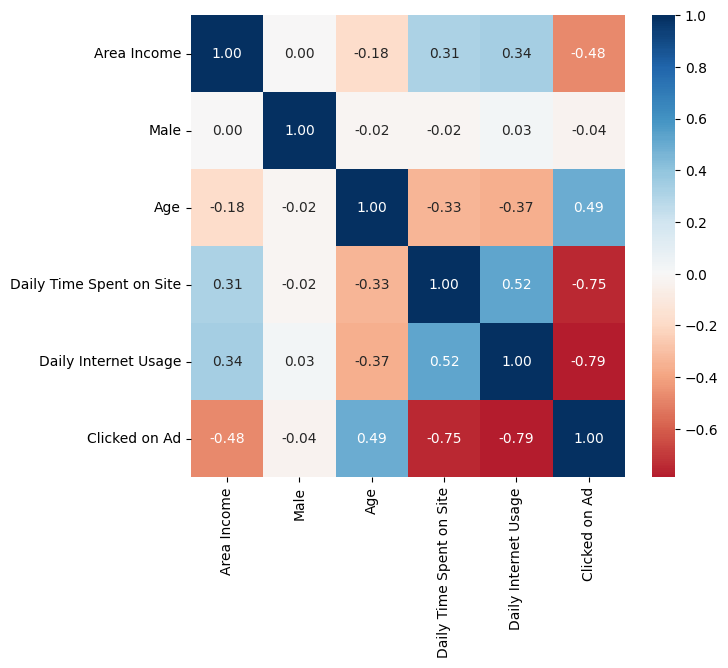

In [8]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df[numerical_columns].corr(), cmap='RdBu', center=0, annot=True, fmt=".2f", ax=ax)
plt.show()

### **Nhận xét** 📈

- Mối tương quan của thuộc tính `Clicked on Ad`
    - Dựa vào ma trận tương quan, ta có thể thấy thuộc tính `Clicked on Ad` có mối tương quan khá lớn với thuộc tính `Daiy Time Spent on Site` và `Daily Internet Usage` → 2 thuộc tính này quyết định khả năng nhấp vào quảng cáo hay không.

    - Các thuộc tính `Area Income` và `Age` có hệ số tương quan ở mức vừa phải với thuộc tính `Clicked on Ad` → 2 thuộc tính này có thể quyết định khả năng nhấp vào quảng cáo hay không.

    - Riêng thuộc tính `Male` thì không có sự tương quan với thuộc tính `Clicked on Ad`. → thuộc tính này không quyết định khả năng nhấp vào quảng cáo hay không.

- Mối tương quan của thuộc tính `Area Income`
    - Ngoài mối tương quan với thuộc tính `Clicked on Ad`, ta còn thấy các thuộc tính khác cũng có mối tương quan như `Age`, `Daily Time Spent on Site` và `Daily Internet Usage`.

    - 2 thuộc tính `Daily Time Spent on Site` và `Daily Internet Usage` có mối tương quan mức vừa phải, riêng với thuộc tính `Age` thì mối tương quan khá thấp nhưng chúng ta vẫn phải xem xét.

- Mối tương quan của thuộc tính `Age`
    - Ngoài mối tương quan với thuộc tính `Clicked on Ad` và `Area Income`, ta còn thấy các thuộc tính khác cũng có mối tương quan như `Daily Time Spent on Site` và `Daily Internet Usage`.

    - 2 thuộc tính `Daily Time Spent on Site` và `Daily Internet Usage` có mối tương quan mức vừa phải.

- Mối tương quan của thuộc tính `Daily Time Spent on Site`
    - Ngoài mối tương quan với thuộc tính `Clicked on Ad`. `Area Income` và `Age`, ta còn thấy các thuộc tính khác cũng có mối tương quan như `Daily Internet Usage`.

    - Thuộc tính `Daily Internet Usage` có mối tương quan khá đáng kể.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 5: Phân tích sâu hơn về mối tương quan giữa các thuộc tính 🔥
</div>

🔎 **Mối tương quan giữa `Age` và `Clicked on Ad`**

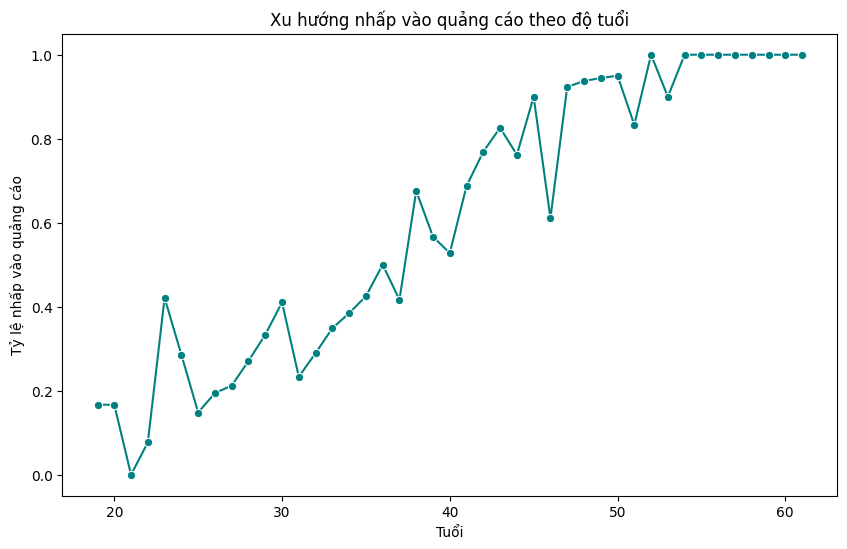

In [9]:
age_click_rate = df.groupby("Age")["Clicked on Ad"].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_click_rate.index, y=age_click_rate.values, marker='o', color="teal")
plt.title("Xu hướng nhấp vào quảng cáo theo độ tuổi")
plt.xlabel("Tuổi")
plt.ylabel("Tỷ lệ nhấp vào quảng cáo")
plt.show()

### **Quan sát** 💬
- Hệ số tương quan giữa Tuổi và Clicked on Ad là 0.49, cho thấy có mối quan hệ tích cực vừa phải giữa hai biến này. Điều này có nghĩa là khi tuổi tăng, tỷ lệ nhấp vào quảng cáo cũng có xu hướng tăng lên. Tuy nhiên, hệ số 0.49 không đủ cao để khẳng định mối quan hệ mạnh mẽ mà chỉ cho thấy một xu hướng tăng vừa phải.

- Những người dùng lớn tuổi hơn (từ khoảng 35 trở lên) có xu hướng nhấp vào quảng cáo cao hơn so với người dùng trẻ tuổi.

- Với kết quả này, các nhà quảng cáo có thể cân nhắc điều chỉnh nội dung quảng cáo và ưu tiên hiển thị nhiều hơn cho nhóm người dùng từ 35 tuổi trở lên, đặc biệt là từ 45 tuổi trở lên, vì nhóm này có tỷ lệ nhấp vào quảng cáo cao.

🔎 **Mối tương quan giữa `Country`, `City` với `Clicked on Ad`**

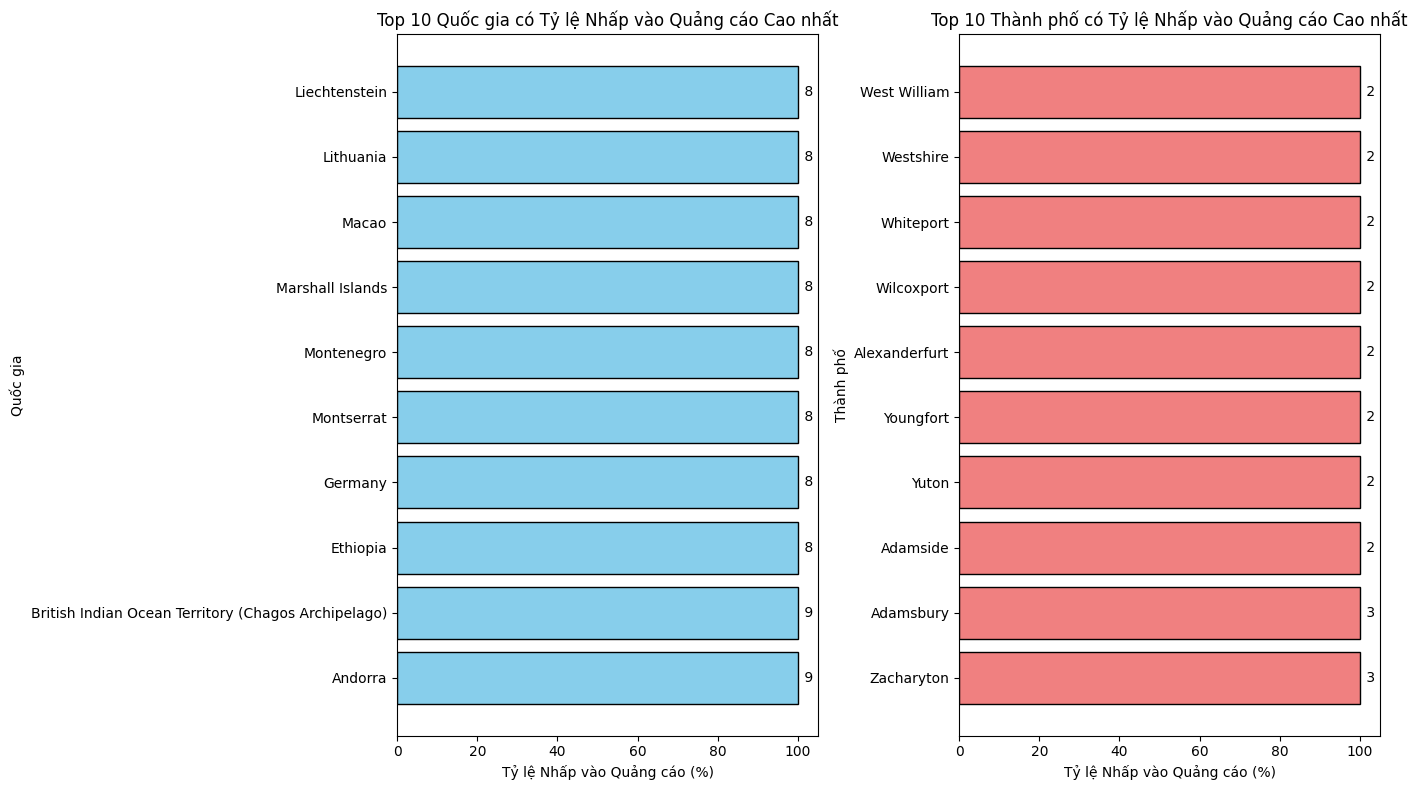

In [10]:
country_click_rate = df.groupby('Country')['Clicked on Ad'].mean().sort_values(ascending=False).head(10) * 100  # Tỷ lệ phần trăm
country_customer_count = df.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False).head(10)

city_click_rate = df.groupby('City')['Clicked on Ad'].mean().sort_values(ascending=False).head(10) * 100  # Tỷ lệ phần trăm
city_customer_count = df.groupby('City')['Clicked on Ad'].count().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 8)) 

axes[0].barh(country_click_rate.index, country_click_rate.values, color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 Quốc gia có Tỷ lệ Nhấp vào Quảng cáo Cao nhất')
axes[0].set_xlabel('Tỷ lệ Nhấp vào Quảng cáo (%)')
axes[0].set_ylabel('Quốc gia')

for i, v in enumerate(country_customer_count):
    axes[0].text(country_click_rate.iloc[i] + 0.5, i, f' {v}', va='center')

axes[1].barh(city_click_rate.index, city_click_rate.values, color='lightcoral', edgecolor='black')
axes[1].set_title('Top 10 Thành phố có Tỷ lệ Nhấp vào Quảng cáo Cao nhất')
axes[1].set_xlabel('Tỷ lệ Nhấp vào Quảng cáo (%)')
axes[1].set_ylabel('Thành phố')

for i, v in enumerate(city_customer_count):
    axes[1].text(city_click_rate.iloc[i] + 0.5, i, f' {v}', va='center')

plt.tight_layout()
plt.show()


In [11]:
df_copy = df.copy()

# Encode cột Country thành giá trị số
label_encoder = LabelEncoder()
df_copy['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# Encode cột City thành giá trị số
label_encoder = LabelEncoder()
df_copy['City_encoded'] = label_encoder.fit_transform(df['City'])

# Tính toán hệ số tương quan của cột Country_encoded và Clicked on Ad
corr, _ = pearsonr(df_copy["Country_encoded"], df_copy["Clicked on Ad"])
print(f"Hệ số tương quan giữa quốc gia và Clicked on Ad: {corr:.2f}")

# Tính toán hệ số tương quan của cột City_encoded và Clicked on Ad
corr, _ = pearsonr(df_copy["City_encoded"], df_copy["Clicked on Ad"])
print(f"Hệ số tương quan giữa thành phố và Clicked on Ad: {corr:.2f}")

Hệ số tương quan giữa quốc gia và Clicked on Ad: 0.01
Hệ số tương quan giữa thành phố và Clicked on Ad: -0.01


### **Quan sát** 💬
- Qua phân tích, ta có thể nhận ra một số quốc gia hoặc khu vực có tỷ lệ nhấp vào quảng cáo cao hơn. Điều này có thể là do đặc điểm văn hóa, thói quen người dùng, hoặc thị hiếu tại các quốc gia này, cho thấy đây có thể là thị trường quảng cáo tiềm năng.

- Tuy nhiên dựa theo giá trị hệ số tương quan (0,01 và -0,01) gần bằng 0 cho thấy không có mối tương quan tuyến tính rõ ràng giữa quốc gia hoặc thành phố của người dùng và khả năng nhấp vào quảng cáo.

🔎 **Mối tương quan giữa thuộc tính `City` và `Daily Time Spent on Site`**

Đầu tiên, ta sẽ lấy top 10 thành phố có đông người dùng nhất và top 10 thành phố có ít người dùng nhất để kiểm tra tổng thời gian truy cập vào Site của các thành phố đó.

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64


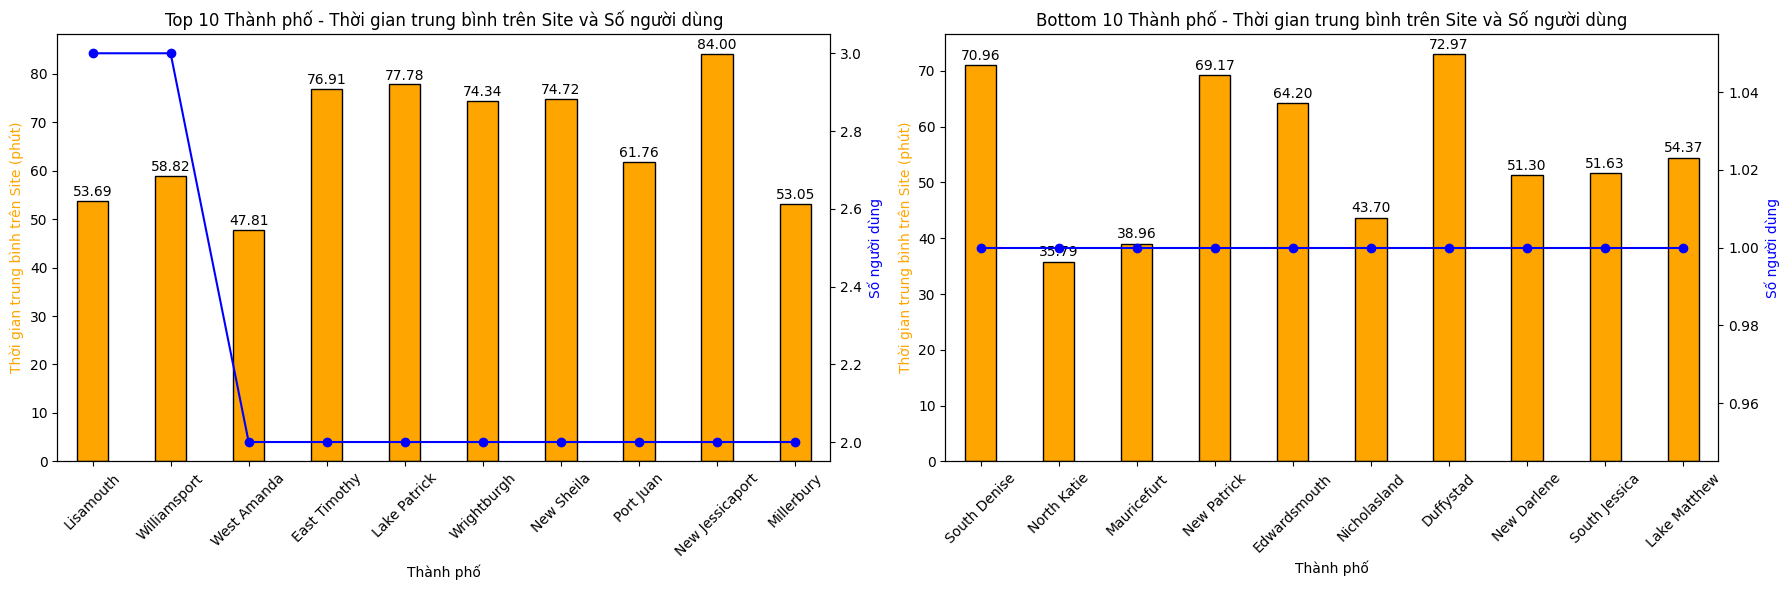

In [12]:
print(df['Daily Time Spent on Site'].describe())

# Get the top 10 and bottom 10 cities based on user count
top_cities = df['City'].value_counts().head(10).index
bottom_cities = df['City'].value_counts().tail(10).index

# Calculate the mean time spent for top and bottom cities
total_time_top_cities = df.groupby('City')['Daily Time Spent on Site'].mean().loc[top_cities]
total_time_bottom_cities = df.groupby('City')['Daily Time Spent on Site'].mean().loc[bottom_cities]

# Create subplots for top and bottom cities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Create twin axes for each plot
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# Plot for top 10 cities
total_time_top_cities.plot(kind='bar', ax=ax1, color='orange', edgecolor='black', width=0.4)
df[df['City'].isin(top_cities)]['City'].value_counts().loc[top_cities].plot(kind='line', ax=ax3, color='blue', marker='o')
ax1.set_ylabel('Thời gian trung bình trên Site (phút)', color='orange')
ax3.set_ylabel('Số người dùng', color='blue')
ax1.set_xlabel('Thành phố')
ax1.set_title('Top 10 Thành phố - Thời gian trung bình trên Site và Số người dùng')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Display average time values above bars in top cities
for i, v in enumerate(total_time_top_cities):
    ax1.text(i, v + 1, f'{v:.2f}', ha='center')

# Plot for bottom 10 cities
total_time_bottom_cities.plot(kind='bar', ax=ax2, color='orange', edgecolor='black', width=0.4)
df[df['City'].isin(bottom_cities)]['City'].value_counts().loc[bottom_cities].plot(kind='line', ax=ax4, color='blue', marker='o')
ax2.set_ylabel('Thời gian trung bình trên Site (phút)', color='orange')
ax4.set_ylabel('Số người dùng', color='blue')
ax2.set_xlabel('Thành phố')
ax2.set_title('Bottom 10 Thành phố - Thời gian trung bình trên Site và Số người dùng')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Display average time values above bars in bottom cities
for i, v in enumerate(total_time_bottom_cities):
    ax2.text(i, v + 1, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

### **Quan sát** 💬
- Dựa vào biểu đồ, ta có thể thấy các thành phố có đông người dùng lại có thời gian truy cập vào Site trung bình khá thấp. Ví dụ điển hình là 2 thành phố Lisamouth và Williamsport, mỗi thành phố có 3 người truy cập trong bộ dữ liệu và có lượng thời gian truy cập vào Site lần lượt là 53.69 phút và 58.82 phút mỗi ngày.

- Ngược lại, những thành phố có ít người lại có thời gian truy cập vào Site trung bình lại khá cao. Điển hình là thành phố South Denise có 1 người dùng với lượng thời gian trung bình là 70.96 phút, thành phố Duffystad có 1 người dùng với lượng thời gian trung bình là 72.97 phút.

- Tuy nhiên, không phải thành phố đông người nào cũng có thời gian truy cập Site trung bình ít, cũng không phải thành phố ít người nào cũng có thời gian truy cập Site trung bình cao. Ví dụ như thành phố North Katie với 1 người dùng nhưng lượng thời gian trung bình chỉ có 35.79 phút, thành phố New Jessicaport với 2 người dùng nhưng lượng thời gian trung bình khá cao là 84 phút.


--> Vì vậy, ta có thể kết luận rằng thuộc tính thành phố không ảnh hưởng đến việc người dùng có giành nhiều thời gian cho việc truy cập vào Site hay không.

Tiếp theo, ta sẽ lấy top 10 thành phố có thời gian truy cập vào Site nhiều nhất cũng như top 10 thành phố có thời gian truy cập vào Site thấp nhất.

🔎 **Mối tương quan giữa các thuộc tính `Area Income`, `Age`, `Daily Time Spent on Site` và `Daily Internet Usage`**

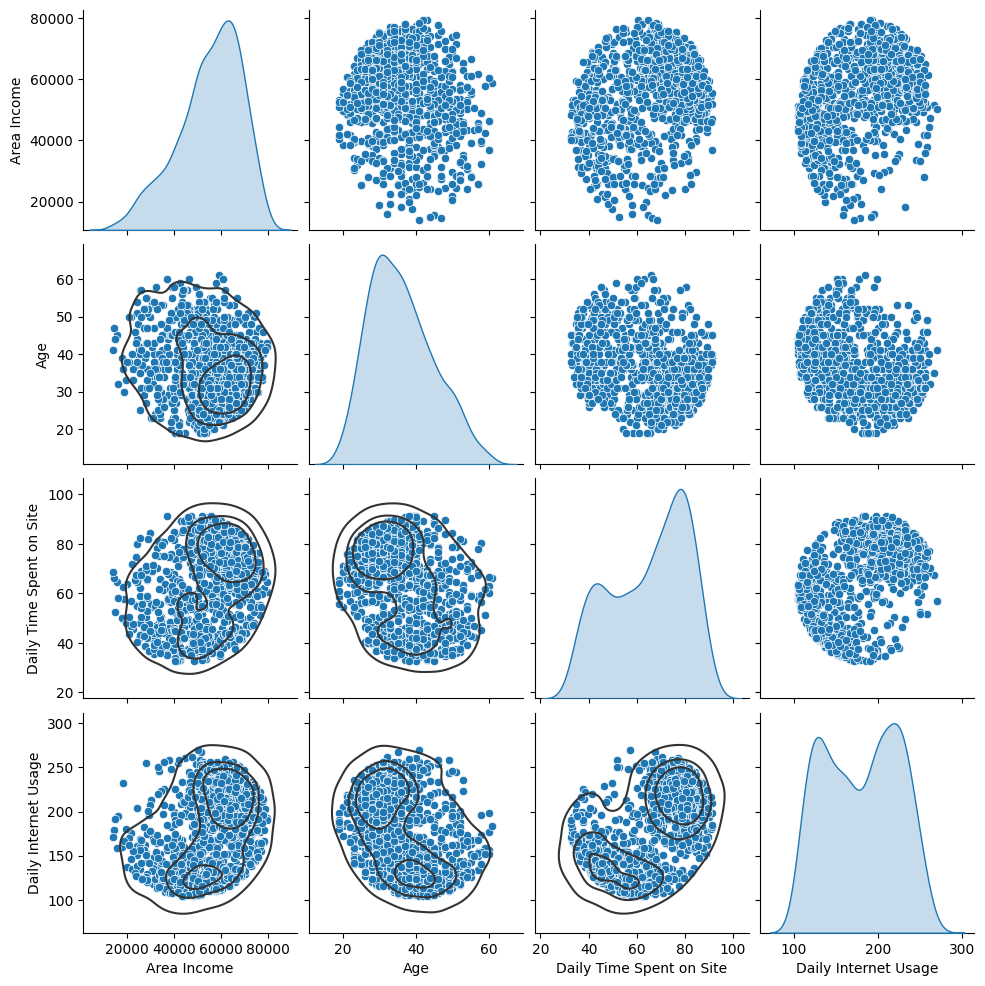

In [13]:
pairplot_fig = sns.pairplot(df[['Area Income', 'Age', 'Daily Time Spent on Site', 'Daily Internet Usage']], diag_kind="kde")
pairplot_fig.map_lower(sns.kdeplot, levels=4, color=".2")

### **Quan sát** 💬
- Với thuộc tính `Area Income`, ta có thể thấy khi thu nhập trung bình khu vực của một khách hàng càng cao thì thời gian truy cập vào Site và thời gian sử dụng Internet càng cao. Cụ thể là những người có mức thu nhập từ 50000 trở lên có thời gian truy cập vào Site từ 60 phút mỗi ngày trở lên.

- Riêng với thời gian sử dụng Internet thì ta còn thấy rằng nếu mức thu nhập càng thấp thì thời gian sử dụng Internet cũng thấp lại.

- Với thuộc tính `Age`, ta có thể thấy với độ tuổi càng cao thì mức thu nhập cũng thấp lại. 

- Ngoài ra, những người càng trẻ tuổi thì càng có xu hướng truy cập Internet và truy cập vào Site nhiều. Còn những người lớn tuổi lại truy cập vào Site và Internet khá ít.

- Riêng với một nhóm nhỏ những người khoảng 40 tuổi cũng có tầng suất truy cập Internet rất ít.

- Với nhóm thuộc tính `Daily Time Spent on Site` và `Daily Internet Usage`, ta có thể thấy khi thời gian truy cập Internet càng nhiều thì càng có khả năng truy cập vào Site hơn, ngược lại khi thời gian truy cập vào Internet càng ít lại thì khả năng truy cập vào Site cũng ít lại.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 6: Phân tích mối quan hệ giữa các cặp thuộc tính với `Clicked on Ad` 🔥
</div>

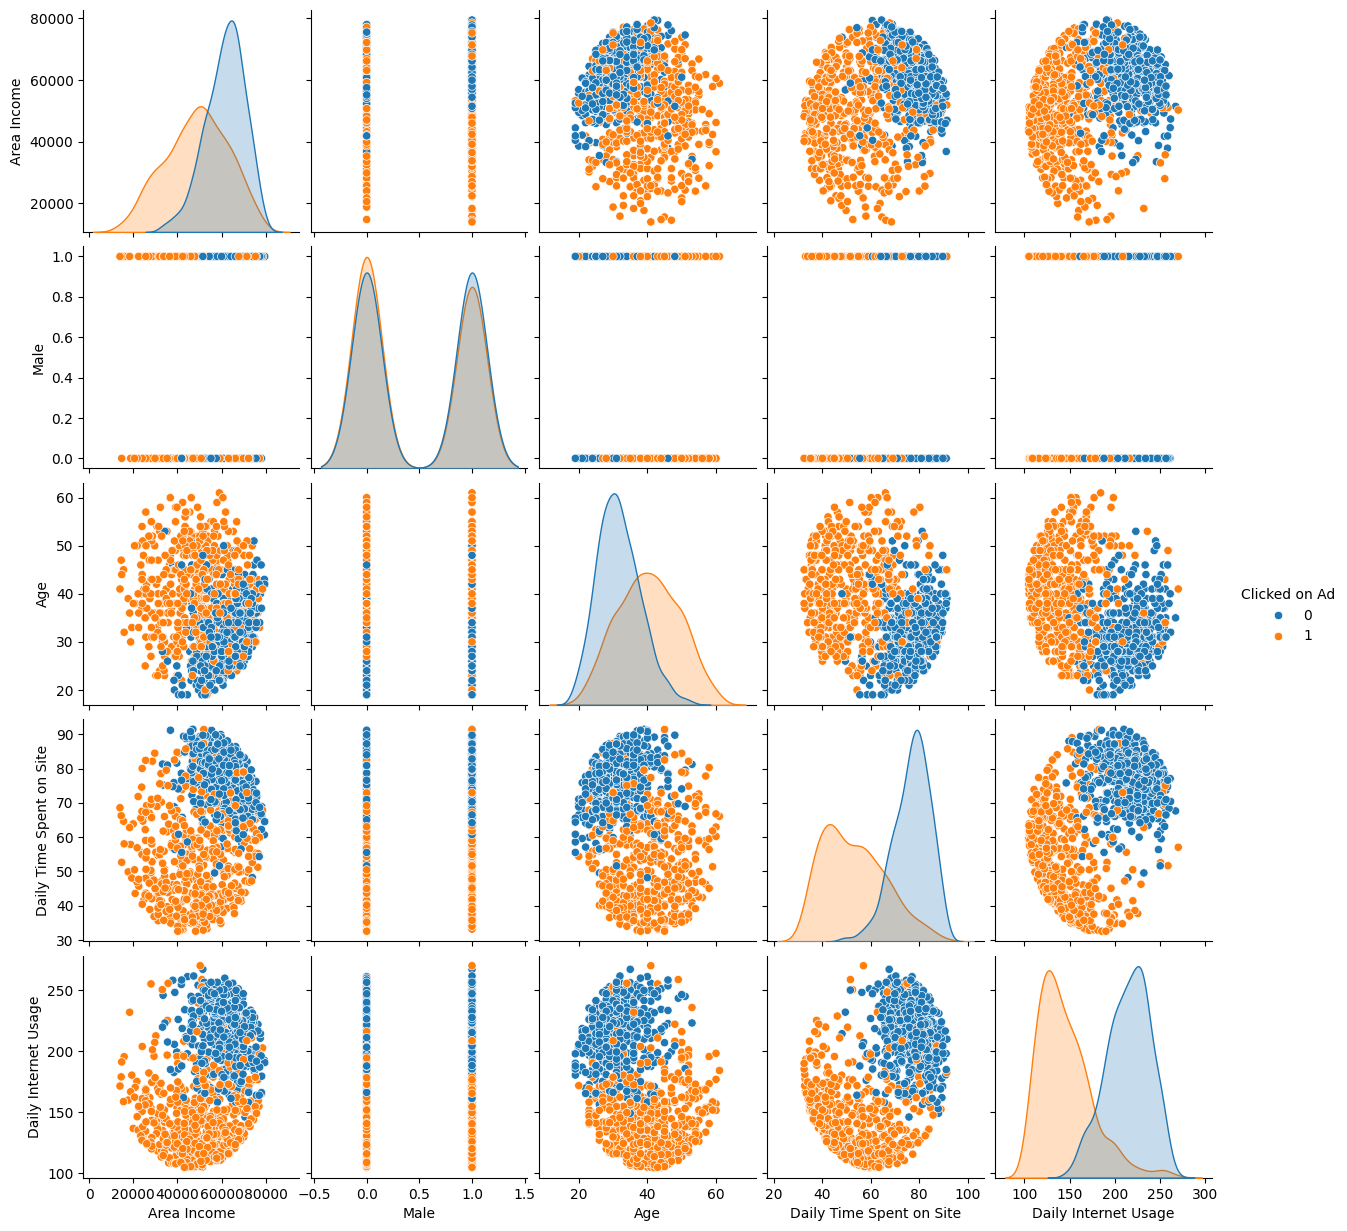

In [14]:
sns.pairplot(data=df[numerical_columns], hue="Clicked on Ad")

### **Quan sát** 💬
Từ biểu đồ ta thấy được những người có khả năng nhấp vào quảng cáo là những loại người sau:
- Người có thu nhập ở các khoảng và thời gian truy cập vào Internet thấp

- Người có thu nhập ở các khoảng và thời gian truy cập vào Site thấp

- Người có thu nhập thấp hoặc trung bình và độ tuổi ở các khoảng

- Người có độ tuổi ở các khoảng và thời gian truy cập vào Internet thấp

- Người có độ tuổi ở các khoảng và thời gian truy cập vào Site thấp

- Người có thời gian truy cập vào Internet thấp đồng thời thời gian truy cập vào Site cũng thấp

### **Nhận xét** 📈
- Những người có thu nhập cao (>50000) thường sẽ không nhấp vào quảng cáo, đặc biệt là những người có thu nhập cao và nằm trong độ tuổi từ khoảng 20 cho tới 40. Độ tuổi mà người dùng nhấp vào quảng cáo dao động từ 30 tới 50 tuổi. Mức thu nhập của người nhấp vào quảng cáo phân bố cũng khá đều, nghĩa là người nhấp vào quảng cáo sẽ phụ thuộc vào độ tuổi nhiều hơn so với mức thu nhập.

- Những người dùng dành ít thời gian trên Site thì khả năng họ sẽ nhấp vào quảng cáo gần như là 100%. Tương tự, người dùng càng truy cập vào Internet ít thì khả năng nhấp vào quảng cáo cũng gần như là 100%. Tuy nhiên, khi xét thêm mức thu nhập của khách hàng ngoài 2 thuộc tính đó, thì 2 thuộc tính đó không còn là yếu tố quyết định vì tỉ lệ khách hàng có mức thu nhập cao có ít khả năng nhấp vào quảng cáo hơn so với những người có mức thu nhập thấp.

- Tương tự với mức thu nhập, khi xét đến thuộc tính độ tuổi thì 2 thuộc tính đó không còn là yếu tố quyết định vì tỉ lệ khách hàng có độ tuổi thấp (20 - 40) có khả năng nhấp vào quảng cáo rất thấp.

- Khi xét đến thời gian truy cập vào Site và thời gian sử dụng Internet với việc nhấp vào quảng cáo, ta có thể thấy được thời gian truy cập Internet càng ít cũng như thời gian truy cập vào Site càng ít thì có khả năng nhấp vào quảng cáo càng cao. Ngược lại, thời gian truy cập Internet càng nhiều và thời gian truy cập vào Site cũng nhiều thì khả năng nhấp vào quảng cáo càng thấp.

🔎 **Mối tương quan giữa thuộc tính `Timestamp` và `Clicked on Ad`**

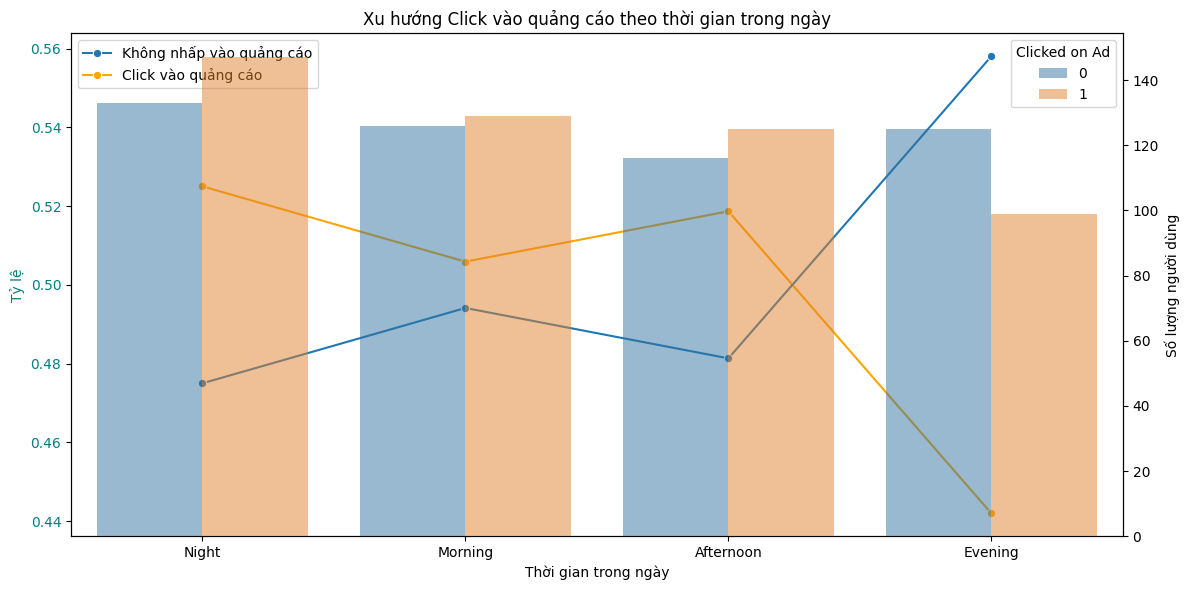

In [15]:
# time in day, Morning, Afternoon, Evening, Night
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Time'] = pd.cut(df['Hour'], bins=[-1, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df.drop(columns=['Hour'], inplace=True)

# Tính tỷ lệ click và không click cho mỗi thời gian trong ngày
click_rate_time = df.groupby('Time', observed=False)['Clicked on Ad'].mean()
not_click_rate_time = 1 - click_rate_time  # Tỷ lệ không click vào quảng cáo

fig, ax1 = plt.subplots(figsize=(12, 6))

# Tạo trục y thứ hai cho biểu đồ countplot
ax2 = ax1.twinx()

# Vẽ biểu đồ line cho tỷ lệ click vào quảng cáo theo thời gian trong ngày
sns.lineplot(x=not_click_rate_time.index, y=not_click_rate_time.values, marker='o', ax=ax1, zorder=2, label="Không nhấp vào quảng cáo")  # Đường tỷ lệ không click

sns.lineplot(x=click_rate_time.index, y=click_rate_time.values, marker='o', color="orange", ax=ax1, zorder=1, label="Click vào quảng cáo")  # Đường tỷ lệ click
# Vẽ biểu đồ line cho tỷ lệ không nhấp vào quảng cáo theo thời gian trong ngày

ax1.set_xlabel("Thời gian trong ngày")
ax1.set_ylabel("Tỷ lệ", color="teal")
ax1.set_title("Xu hướng Click vào quảng cáo theo thời gian trong ngày")
ax1.tick_params(axis='y', labelcolor="teal")

# Vẽ biểu đồ countplot cho số lượng người dùng nhấp vào quảng cáo theo thời gian trong ngày
sns.countplot(data=df, x='Time', hue='Clicked on Ad', ax=ax2, zorder=3, alpha=0.5)  # Đặt zorder thấp hơn
ax2.set_ylabel("Số lượng người dùng")
ax2.tick_params(axis='y')

# Thêm legend để phân biệt các đường
ax1.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()




### **Quan sát** 💬
- Ta có thể thấy được từ biểu đồ rằng, người dùng có khả năng nhấp vào quảng cáo cao nhất là ở giờ khuya (0h- 6h), tiếp theo sau đó là ở buổi trưa hoặc chiều (12h - 18h).

- Một khung giờ khác mà người dùng cũng có khả năng nhấp vào quảng cáo là buổi sáng (6h - 12h)

- Khung giờ mà người dùng ít có khả năng nhấp vào quảng cáo nhất là vào buổi tối (18h - 24h)

- Trong 4 khung giờ, chỉ có duy nhất 1 khung giờ có khả năng nhấp vào quảng cáo nhỏ hơn 50% đó là buổi tối, các khung giờ còn lại đều có trên 50% khả năng người dùng nhấp vào quảng cáo.


### **Nhận xét** 📈
- Từ những gì quan sát được, ta có thể hiểu rằng người dùng có xu hướng nhấp vào quảng cáo vào khuya khi họ thức và truy cập vào website hoặc vào buổi trưa.

- Tuy nhiên, dự đoán chưa chắc chính xác vì số liệu vẫn chưa rõ để kết luận rằng khoảng thời gian có thật sự ảnh hưởng đến việc người dùng nhấp vào quảng cáo hay không

## **KẾT LUẬN** ✏️

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
1. Nhận xét chung về các thuộc tính trong dữ liệu 🔥
</div>

Qua giai đoạn EDA, chúng ta có thể kết luận về sự ảnh hưởng của các thuộc tính đối với việc người dùng có nhấp vào quảng cáo hay không như sau:

- Những thuộc tính số có mối tương quan với việc nhấp vào quảng cáo là: `Area Income`, `Age`, `Daily Time Spent on Site`, `Daily Internet Usage`. Chỉ có duy nhất một thuộc tính số không có nhiều ảnh hưởng tới việc nhấp quảng cáo là `Male`.

- Những thuộc tính phân loại và thời gian hầu như đều không ảnh hưởng đến việc nhấp quảng cáo.

- Trong những thuộc tính có mức tương quan lớn, mức độ tương quan sẽ được sắp xếp theo thứ tự sau: `Daily Internet Usage` >= `Daily Time Spent on Site` > `Age` >= `Area Income`.

- Ngoài việc xét đến mức tương quang giữa các thuộc tính với việc nhấp vào quảng cáo. Ta có thể kể đến các bộ thuộc tính sau cũng có mức độ tương quan khá lớn với nhau:
    - `Area Income` có tương quan với `Daily Time Spent on Site` và `Daily Internet Usage`
    - `Age`, `Daily Time Spent on Site` và `Daily Internet Usage` có mối tương quan lẫn nhau

Vì vậy, ta có thể dựa vào các thuộc tính này để xây mô hình phân tích và dự đoán.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
2. Loại bỏ những thuộc tính không cần thiết 🔥
</div>

Sau khi đã kết luận về những thuộc tính quan trọng, ta sẽ bỏ đi những thuộc tính không cần thiết

In [16]:
removed_columns = ['Ad Topic Line', 'Male', 'City', 'Country', 'Timestamp', 'Time']

df.drop(columns=removed_columns, inplace=True)

df.to_csv('../Data/2425_QC_EDA.csv', index=False)